# Классическая модель Фитцхью Нагумо:

$$\begin{equation}
\begin{cases}
\pmb{V_t= V- \frac{V^3}{3}- U + I}\\
\pmb{\tau  U_t= V - \text{$\beta $U} - \alpha}\\
\end{cases}
\end{equation}$$




In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
# y — вектор переменных состояния
# t — время
# b, sgm, eps, a — параметры ДУ

def ode(y, t, b, sgm, eps, a):
        U, V = y
        dydt = [eps * (V - b * U - a), V - (V ** 3)/3 - U + sgm]
        return dydt

In [5]:
# args — Параметры ОДУ
# y0— Начальные условия для первой переменной состояния
# dy0 — Начальные условия для второй переменной состояния
# ts — длительность решения
# nt — Количество шагов в решении (= время интегрирования * шаг времени)

def calcODE(args, y0, dy0, ts, nt):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [6]:
# deltaX — Шаг начальных условий по горизонтальной оси (переменной состояния)
# deltaDX — Шаг начальных условий по вертикальной оси (производной переменной состояния)
# startX — Начальное значение интервала начальных условий
# stopX — Конечное значение интервала начальных условий
# startDX — Начальное значение интервала начальных условий
# stopDX — Конечное значение интервала начальных условий

def drawPhasePortrait(args, deltaX, deltaDX, startX,  stopX, startDX, stopDX, ts, nt):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 1], sol[:, 0], 'b')
    plt.xlabel('V')
    plt.ylabel('U')
    plt.xlim (-5, 5)
    plt.ylim (-5, 5)
    plt.grid(1)
    plt.show()

In [7]:
def drawPhasePortrait_ending(args, deltaX, deltaDX, startX,  stopX, startDX, stopDX, ts, nt):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[1800:, 1], sol[1800:, 0], 'b')
                #print(sol[1800:, 0])
    plt.xlabel('V')
    plt.ylabel('U')
    plt.xlim (-5, 5)
    plt.ylim (-5, 5)
    plt.grid(1)
    plt.show()

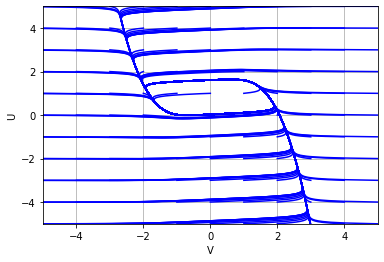

In [8]:
a = -0.7;
b = 0.8;
eps = 0.08;
sgm = 0.8;
args=(b, sgm, eps, a)
drawPhasePortrait(args, 1, 1, -6, 6, -6, 6, ts = 100, nt = 2001)
plt.show()

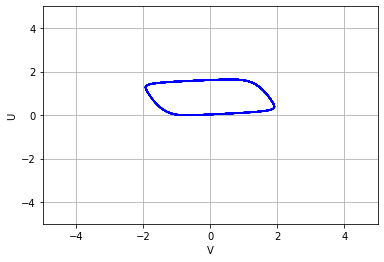

In [9]:
a = -0.7;
b = 0.8;
eps = 0.08;
sgm = 0.8;
args=(b, sgm, eps, a)
drawPhasePortrait_ending(args, 1, 1, -6, 6, -6, 6, ts = 100, nt = 2001)
plt.show()